# Exercise 05

### Name : KUMARA B.W.J.C.
### Index Number : 190328V

In [3]:
%matplotlib inline

# Blobs

### 1.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


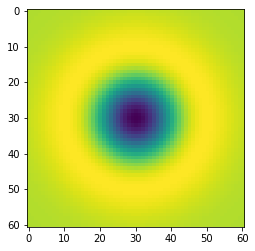

In [18]:
sigma = 10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)

### 2.

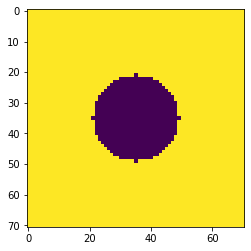

In [9]:
w,h = 71 , 71
hw,hh = w//2 , h//2

f = np.ones((h,w),dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r = w//5
f+=X**2+Y**2>r**2
plt.imshow(f)

### 3.

(35, 35, 4)
9


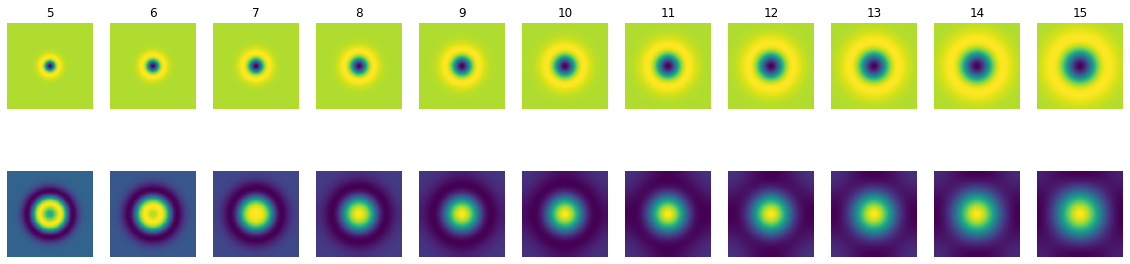

In [19]:
s = 11
fig ,ax = plt.subplots(2,s,figsize =(20,5),facecolor = 'white')
scale_space = np.empty((h,w,s),dtype=np.float32)
sigmas = np.arange(5,16,1)
for i , sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(sigma)
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices) #14/root(2)
print(sigmas[indices[2]])


# Fitting Basics

### 4.

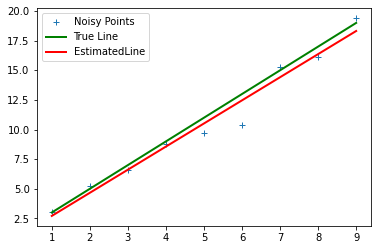

In [27]:

m = 2
c = 1

x = np.arange(1,10,1)
np.random.seed(45)
sigma = 1
n = sigma*np.random.randn(len(x))
o = np.zeros(x.shape)
y = m*x + c +n + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B = np.linalg.pinv(X.T @ X) @X.T @y

m_star = B[0]
c_star = B[1]

plt.plot(x,y, '+',label = 'Noisy Points')
plt.plot([x[0],x[-1]], [m*x[0]+c, m*x[-1] +c], color = 'g', linewidth = 2, label = r"True Line")
plt.plot([x[0],x[-1]], [m_star*x[0]+c_star, m_star*x[-1] +c_star], color = 'r', linewidth = 2, label = r"EstimatedLine")
plt.legend()

### 5.

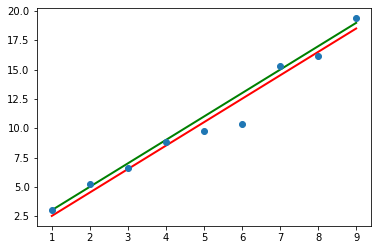

In [26]:
m = 2 # Line equation : y = m*x + c . m i s the s lope . c i s the int e r c ept .
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
sigma=1
noise=sigma*np.random.randn( len(x) )
o = np.zeros ( x.shape )
# o[-1] = 20
n = len(x)

y = m*x + c + noise + o

u11 = np.sum((x-np.mean(x))**2)
u12 =  np.sum((x-np.mean(x))*(y-np.mean(y)))
u21 = u12
u22 = np.sum((y-np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W,V = np.linalg.eig(U)

ev_corresponding_to_ev = V[:,np.argmin(W)]

a = ev_corresponding_to_ev[0]
b = ev_corresponding_to_ev[1]
d = a*np.mean(x) + b*np.mean(y)

mstar=-a/b
cstar=d/b

plt.plot([x[0],x[-1]],[m*x[0]+c,m*x[-1]+c],color='g',linewidth=2,label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar,mstar*x[-1]+cstar],color='r',linewidth=2,label=r'Estimated line')
plt.plot(x,y,'o',label='Noisy Points')